# **End to End TensorFlow Computer Vison - Dog Breed Identificaion**
IN this notebook, I will be using TensorFlow to make predictions on dog breeds.
The objective of this project is to find out how well the neural network can make predictions given a data set of dog breeds.

## Problem
Identifying the breed of a dog

## About the data
The data is sourced from https://www.kaggle.com/competitions/dog-breed-identification/data

In this playground competition, you are provided a strictly canine subset of ImageNet in order to practice fine-grained image categorization. How well you can tell your Norfolk Terriers from your Norwich Terriers? With 120 breeds of dogs and a limited number training images per class, you might find the problem more, err, ruff than you anticipated.

## Evaluation
The prediction is evaluated on MultiClass Log Clasification. A file with prediction probabilities fore each dog breed if each test image

## Features
Unstructured data with images. (No labels)
* There are 120 breeds of dogs(120 different classes)
* There are 10000+ images in the training set
* There are 10000+ images in the test set



In [1]:
# Unzip the data
!unzip '/content/drive/MyDrive/Dog vision/dog-breed-identification.zip' -d '/content/drive/MyDrive/Dog vision/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Dog vision/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: /content/drive/MyDrive/Dog vision/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: /content/drive/MyDrive/Dog vision/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: /content/drive/MyDrive/Dog vision/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: /content/drive/MyDrive/Dog vision/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: /content/drive/MyDrive/Dog vision/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: /content/drive/MyDrive/Dog vision/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: /content/drive/MyDrive/Dog vision/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: /content/drive/MyDrive/Dog vision/train/83fad0718581a696132c96c166472627.jpg  
  inflating: /content/drive/MyDrive/Dog vision/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: /content/drive/M

In [81]:
# import tensforflow
import tensorflow as tf
print(tf.__version__)

2.14.0


In [82]:
# import tensorflow hub
import tensorflow_hub as hub
print(hub.__version__)

0.15.0


In [83]:
# Check for devices
tf.config.list_physical_devices

<function tensorflow.python.framework.config.list_physical_devices(device_type=None)>

In [84]:
# Import pandas and checkout the labels
import pandas as pd
labels_csv = pd.read_csv('/content/drive/MyDrive/Dog vision/labels.csv')

In [85]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [86]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [87]:
# How many images are there of each breed per class?
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

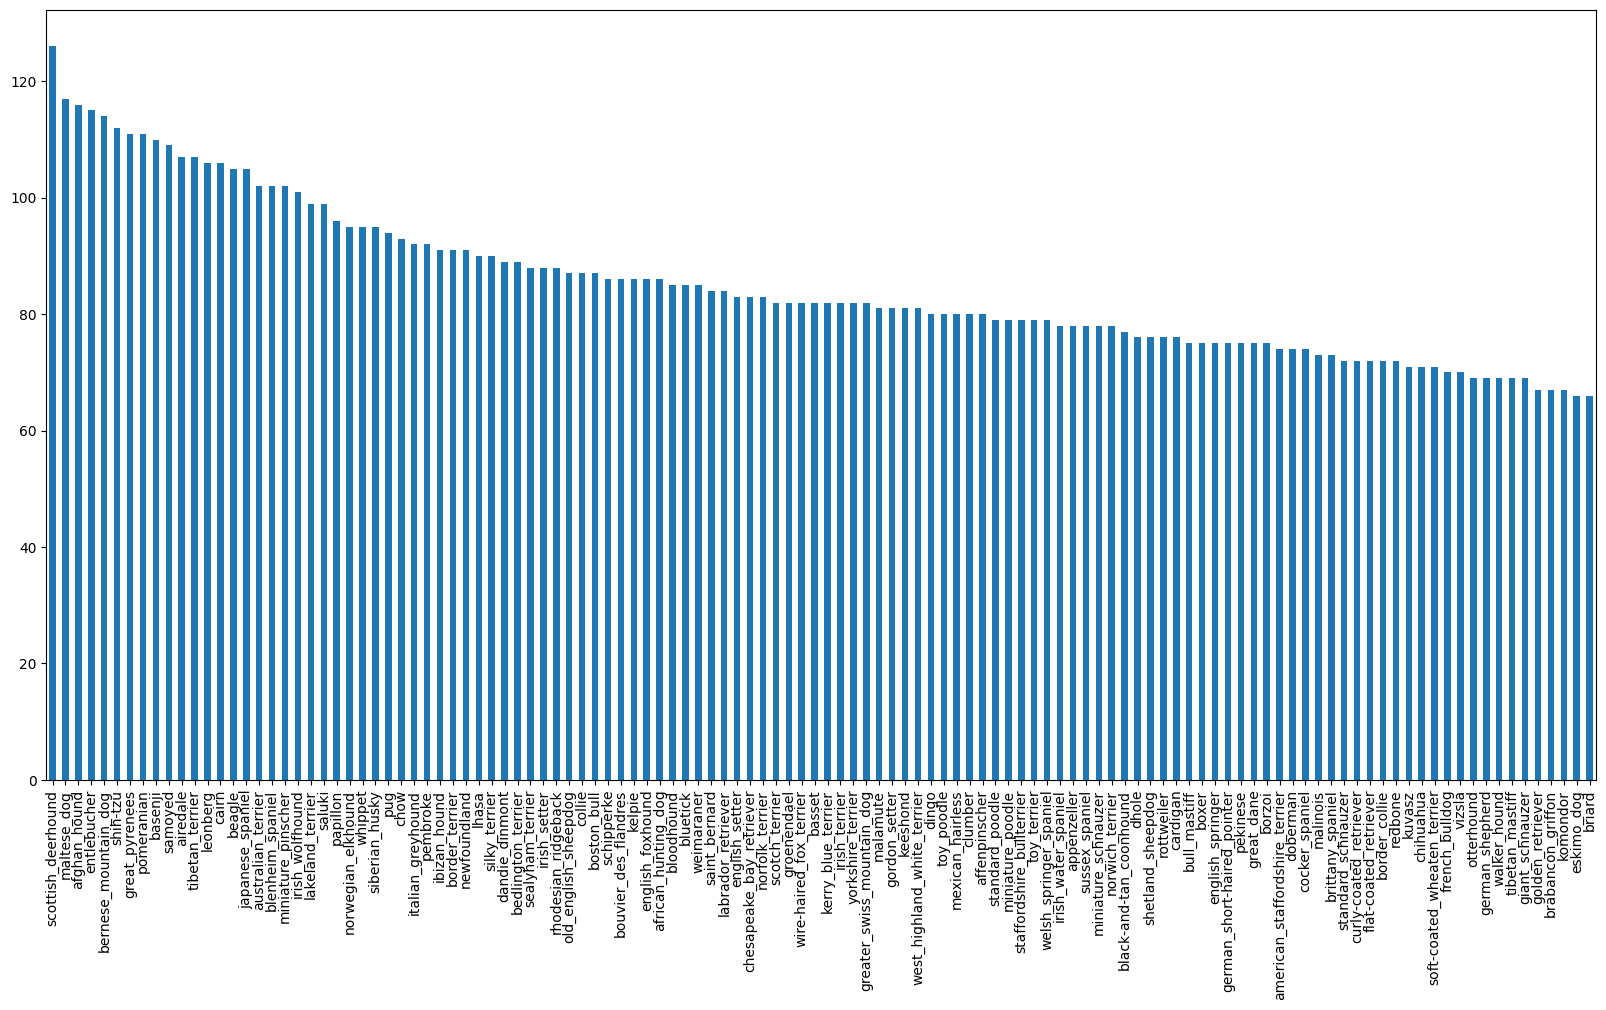

In [88]:
# Visualize the count
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10));

From the above plot it is clear that The scottish deerhound is the most common dog with a frequency of 126 while the least frequent dog is briard at 66

## Preparing the images

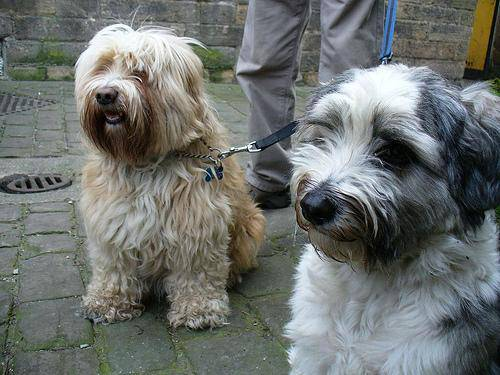

In [89]:
# View the images
from IPython.display import Image
Image('/content/drive/MyDrive/Dog vision/train/ffc532991d3cd7880d27a449ed1c4770.jpg')

### Getting images ang their labels

In [90]:
# Create pathnames form image ID's
filename = [f"/content/drive/MyDrive/Dog vision/train/{fname}.jpg"  for fname in  labels_csv['id']]

# Check the first 10
filename[:10]

['/content/drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [91]:
# Check whether number of filenames matches numebr of actual image files
import os
if len(os.listdir('/content/drive/MyDrive/Dog vision/train/')) == len(filename):
  print("Filenames match actual amount of files!!! Proceed")
else:
  print("Filenames do not match actual amount of files, check the target directrory")

Filenames match actual amount of files!!! Proceed


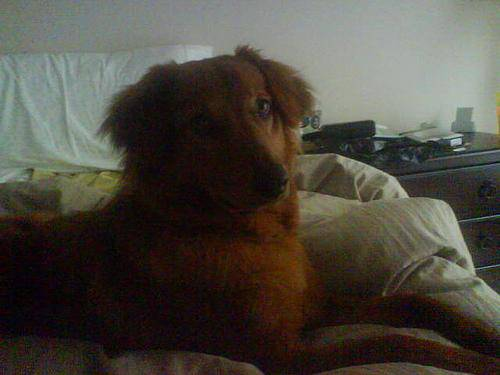

In [92]:
# Check image
Image(filename[1000])


In [93]:
labels_csv["breed"][350]

'whippet'

Filenames match the actual amount of files!!! Proceed


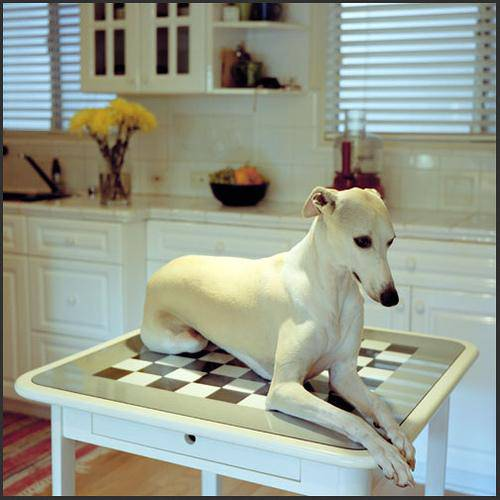

In [94]:
# Create pathnames from image ID's with the ".jpg" file extension
filename = [f"/content/drive/MyDrive/Dog vision/train/{fname}.jpg" for fname in labels_csv['id']]

# Check the first 10
filename[:10]

# Check whether the number of filenames matches the number of actual image files
import os
if len(os.listdir('/content/drive/MyDrive/Dog vision/train/')) == len(filename):
  print("Filenames match the actual amount of files!!! Proceed")
else:
  print("Filenames do not match the actual amount of files, check the target directory")

# Check an image
from IPython.display import Image
Image(filename[350])


## Converting the Labels into Numbers

In [95]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [96]:
## Check if the number of labels matches the number of filenames
if len(labels) == len(filename):
  print("Numbre of labels matches numbre of filenames")
else:
  print("Numbre of labels does not match the number of filenames")

Numbre of labels matches numbre of filenames


In [97]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [98]:
 # Check the length
 len(unique_breeds)

120

In [99]:
# Turn a single labesl into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [100]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [101]:
# Example: Turning Boolean arrays into integers
print(labels[0])
print(np.where(unique_breeds == labels[0])) # Index where lable occurs
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Splitting the data

In [102]:
# Setup X and y variables
X = filename
y = boolean_labels

Start off by 1000 images and increment gradually while experimenting

In [103]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000, step:1000}

In [104]:
# Creating the validation set
from sklearn.model_selection import train_test_split

# split them into trianing and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [105]:
# Check the training data
X_train[:1], y_train[:1]

(['/content/drive/MyDrive/Dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

### Preprocessing images - Turning images into tensors

In [106]:
# Converting images to numpy arrays
from matplotlib.pyplot import imread
image = imread(filename[42])
image.shape

(257, 350, 3)

In [107]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [108]:
# Creat a function to preprocess the images
import tensorflow as tf

def preprocess_image(image_path):
    # Load the image from the file
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)

    # Covert the colour channels from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Convert the image to a tensor
    image = tf.convert_to_tensor(image)

    # Resize the image to (224, 224)
    image = tf.image.resize(image, (224, 224))

    return image


### Turning the data into batches

In [109]:
# Create function to return a tuple of tensors
def get_image_label(image_path, label):
  image = preprocess_image(image_path)
  return image, label

In [110]:
preprocess_image(filename[42]), y[42]

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [111]:
# Define the batch size to 32 which is the default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, bacth_size=BATCH_SIZE, valid_data=False, test_data=False):
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(preprocess_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't neet to shuffle it
  elif valid_data:
    print("Creating validation data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch


In [112]:
# Create training and  validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches


In [113]:
# Check out the different attributes of the data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [114]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

### Creating Visualizations

In [115]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  # Set up the figure
  plt.figure(figsize=(15,15))
  # Loop through
  for i in range(25):
    # Create subplots
    ax = plt.subplot(5,5, i+1)
    # Display the image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Grid lines
    plt.axis("off")


In [116]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.03100623, 0.07414349, 0.01924152],
          [0.03433999, 0.07747725, 0.02257528],
          [0.02986483, 0.06908052, 0.02657352],
          ...,
          [0.37863144, 0.36686674, 0.3472589 ],
          [0.2654636 , 0.26665413, 0.22565264],
          [0.24594213, 0.25378528, 0.20280488]],
 
         [[0.0338283 , 0.06837837, 0.0163388 ],
          [0.03709734, 0.07164741, 0.01960784],
          [0.02999825, 0.06325913, 0.02098215],
          ...,
          [0.23643653, 0.22467183, 0.20506398],
          [0.21545653, 0.21664707, 0.17564557],
          [0.44946796, 0.4573111 , 0.4063307 ]],
 
         [[0.03411451, 0.06548706, 0.01450666],
          [0.03614321, 0.06751576, 0.01653537],
          [0.03105742, 0.06211485, 0.01992297],
          ...,
          [0.25851697, 0.24675225, 0.2271444 ],
          [0.505248  , 0.50618076, 0.46556595],
          [0.27422273, 0.28036767, 0.23193456]],
 
         ...,
 
         [[0.11471023, 0.08725924, 0.06372983],
          [0.15982

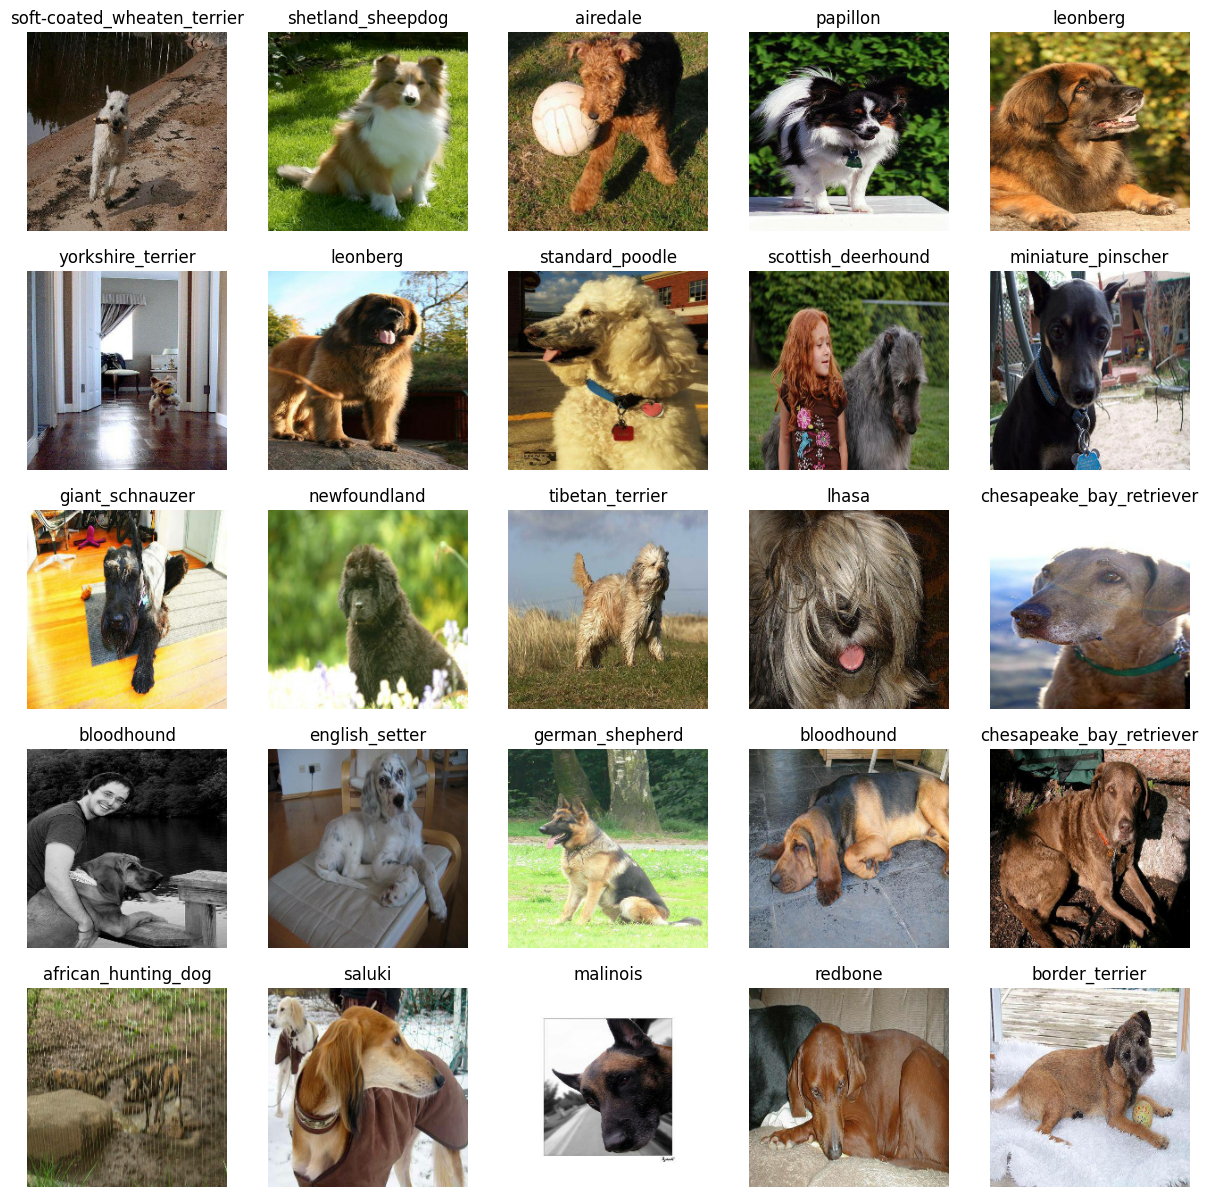

In [117]:
# Visualize the data in a training batch
show_25_images(train_images, train_labels)

# Modelling

### Preparing the inputs and outputs

In [118]:
# Setup the input shape to the model
IMG_SIZE = (224, 224)
INPUT_SHAPE = [None, IMG_SIZE[0], IMG_SIZE[1], 3] # batch, height, width, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL form TensorFlowHub
MODEL_URL = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'

In [119]:
# Create a function that builds a keras model
def create_model(input_shape=INPUT_SHAPE, ouput_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with :", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation='softmax') # Layer 2 output layer
  ])

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [120]:
# Run the model
model = create_model()
model.summary()

Building model with : https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_7 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_7 (Dense)             (None, 120)               120240    
                                                                 
Total params: 3660505 (13.96 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


### Creating Callbacks

In [139]:
# Tensorboard extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [140]:
import datetime

# Create a function to build a tensorboard callback
def create_tensorboard_callback():
  logdir = os.path.join("/content/drive/MyDrive/Dog_vision/logs",
                        # Make it so the logs tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping callback

In [141]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                   patience=3)

In [142]:
# Training a  model (on subset of data)
NUM_EPOCHS = 100 #@param {type:'slider', min:10, max:100, step:10}

In [143]:
# Create a function that trains a model
def train_model():
  "Trains a given model and returns the trained version"

  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit teh modle to the data passing it
  history = model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return
  return model

In [144]:
# Fit the model to the data
model = train_model()

Building model with : https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
Epoch 1/100
25/25 [==============================] - 12s 224ms/step - loss: 4.5808 - accuracy: 0.0925 - val_loss: 3.0906 - val_accuracy: 0.3400
Epoch 2/100
25/25 [==============================] - 3s 117ms/step - loss: 1.5431 - accuracy: 0.7113 - val_loss: 1.8950 - val_accuracy: 0.6100
Epoch 3/100
25/25 [==============================] - 3s 120ms/step - loss: 0.5142 - accuracy: 0.9400 - val_loss: 1.4836 - val_accuracy: 0.6450
Epoch 4/100
25/25 [==============================] - 4s 159ms/step - loss: 0.2279 - accuracy: 0.9912 - val_loss: 1.3433 - val_accuracy: 0.6800
Epoch 5/100
25/25 [==============================] - 3s 116ms/step - loss: 0.1331 - accuracy: 0.9962 - val_loss: 1.2719 - val_accuracy: 0.6950
Epoch 6/100
25/25 [==============================] - 3s 116ms/step - loss: 0.0922 - accuracy: 0.9987 - val_loss: 1.2433 - val_accuracy: 0.6850
Epoch 7/100
25/25 [==============================] -

Well, It seems that the above model is overfitting since its accuracy on training data is far much better than on the validatation data


### Plot the loss curves

In [163]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='validation_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()


  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='validation_accuracy')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()


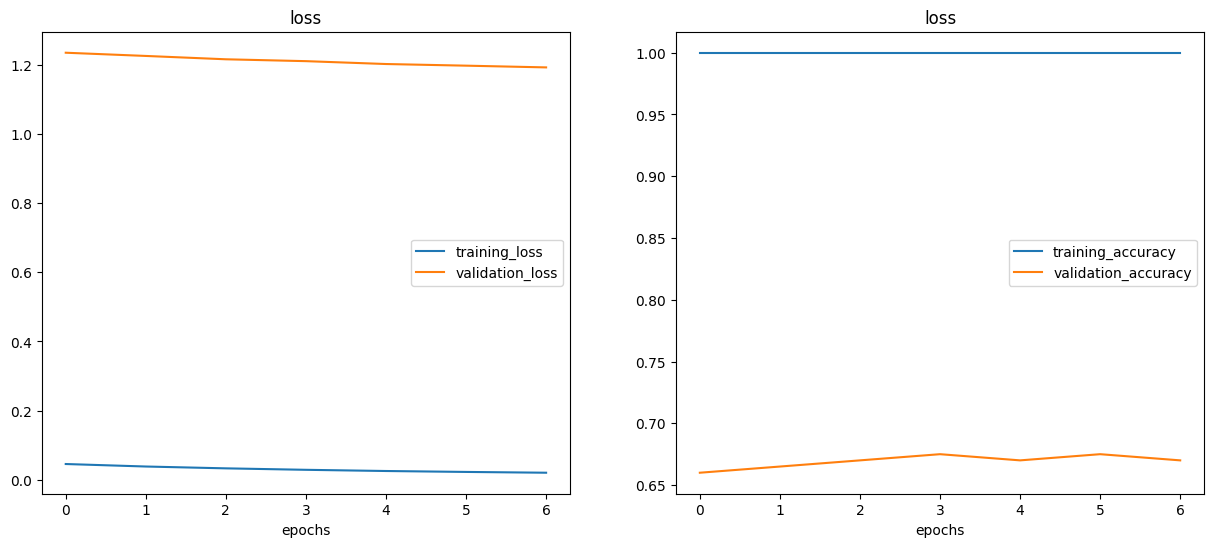

In [164]:
plot_loss_curve(history=history)

### Make prediction
Try making a prediction using the overfitted model

In [171]:
# Make prediction on the validation data
predictions = model.predict(val_data)
predictions

7/7 [==============================] - 1s 109ms/step


array([[2.4951189e-03, 2.3867094e-04, 1.5702740e-04, ..., 2.1193708e-04,
        2.0212524e-04, 3.1532773e-03],
       [5.0116889e-04, 5.4515833e-03, 1.3969279e-02, ..., 3.9333562e-04,
        1.8003030e-03, 1.8118206e-05],
       [1.2689474e-05, 3.3223998e-05, 4.8933362e-05, ..., 5.3553129e-05,
        5.6974772e-05, 1.7732009e-03],
       ...,
       [5.4237684e-05, 7.7076336e-05, 1.4895121e-05, ..., 2.4369814e-05,
        6.0274784e-04, 1.9060663e-04],
       [1.1575524e-03, 2.0688705e-05, 2.4264056e-04, ..., 3.1719279e-05,
        8.0147940e-05, 4.1540926e-03],
       [6.6482557e-05, 7.3814750e-05, 6.6023655e-05, ..., 9.9326286e-04,
        2.1069630e-03, 1.3321376e-03]], dtype=float32)

In [172]:
predictions.shape

(200, 120)

In [ ]:
# First Prediction
print(predictions[0])

In [179]:
# First prediction
index = 42 # Use any index
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.80677249e-04 3.39066391e-05 2.87220446e-05 1.39914599e-04
 1.20993599e-03 1.71333959e-04 2.09539212e-04 1.61008409e-03
 2.98977783e-03 2.12708898e-02 4.93583429e-05 1.32553396e-04
 6.62389852e-04 8.24473891e-03 7.99581176e-04 1.56187941e-03
 1.76624126e-05 7.15509232e-05 1.61438831e-03 1.25703082e-05
 3.47565583e-05 7.61730771e-04 1.10286011e-04 5.15026113e-06
 1.14722806e-03 1.40671546e-05 3.05021113e-05 4.82583382e-05
 1.01085876e-04 1.73637909e-05 2.11586430e-05 1.46718201e-04
 5.01095237e-05 1.52813096e-04 2.25988770e-04 1.35549435e-05
 3.63107974e-05 1.91231375e-03 1.52424065e-04 5.85096061e-01
 6.12670614e-04 1.26745545e-05 1.49325165e-03 1.68145325e-05
 1.37669907e-04 3.07569135e-05 1.58548384e-04 3.58585850e-04
 5.68013565e-05 5.13980776e-05 3.82385246e-04 3.53605719e-05
 1.21504512e-04 1.51338440e-03 2.69793927e-05 6.92278496e-04
 7.46443257e-05 1.85215540e-04 1.08266613e-04 4.95210725e-06
 1.49603831e-04 1.59024028e-04 6.14286455e-06 3.53330288e-05
 2.79555770e-05 6.353380

In [180]:
unique_breeds[39]

'english_foxhound'

In [185]:
# Create a function to view the predicted labels
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediciton probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'irish_setter'

In [186]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [190]:
images_ = []
labels_ = []

# Loop througy unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [191]:
get_pred_label(labels_[0])

'cairn'

In [198]:
# Unbatch function
def unbatchify(data):

  images = []
  labels = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels

# Unbatchify the validation set
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [199]:
get_pred_label(val_labels[0])

'affenpinscher'

### Make predictions and visualize

Now that I've got the:
* prediction labels
* validation labels
* validation images

Its time to make visualizations

Create a function that :
* Takes an array of prediction probabilities, an array of images and integers
* Convert the prediction probabilites to a predicted label.
* Plot the predited label, its prediction probability, the truth label and the targe image on a single plot

In [204]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot image & image remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])


  # Change the color
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'


  # Change plot title to be predicted, probability of prediction  and truth label

  plt.title("Predicted: {} {:2.2f}% Truth: {}".format(pred_label, np.max(pred_prob)*100, true_label),
            color=color)


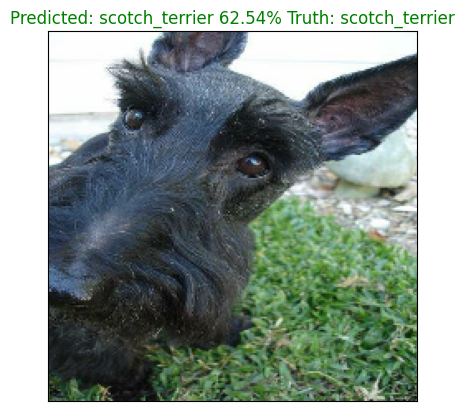

In [205]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [213]:
# Plot the top 10 Predicted values
def plot_pred_conf(prediction_probabilities, labels, n=1):
  ## Prediction confidences along with the truth labels"
  pred_prob, true_label, = prediction_probabilities[n], labels[n]

  # Get the  predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidences
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidences
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction  labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup the plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')

  # change the color of the true labels
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')

  else:
    pass

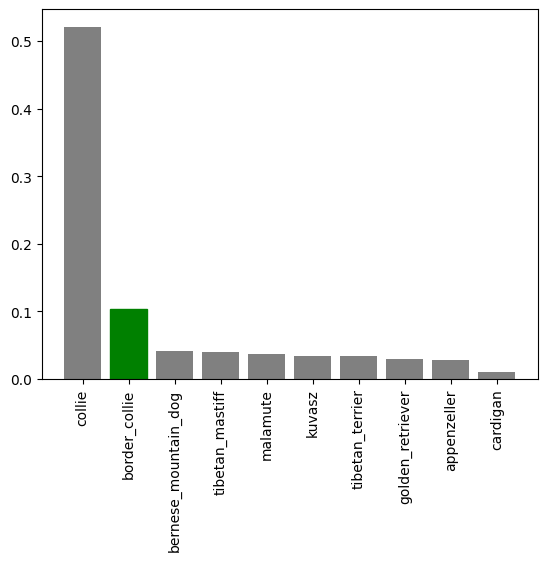

In [214]:
plot_pred_conf(prediction_probabilities = predictions,
               labels = val_labels,
               n = 9)

The model has predicted `collie` but the actual label is `border_collie`

In [215]:
# use previous functions to visualize predicted

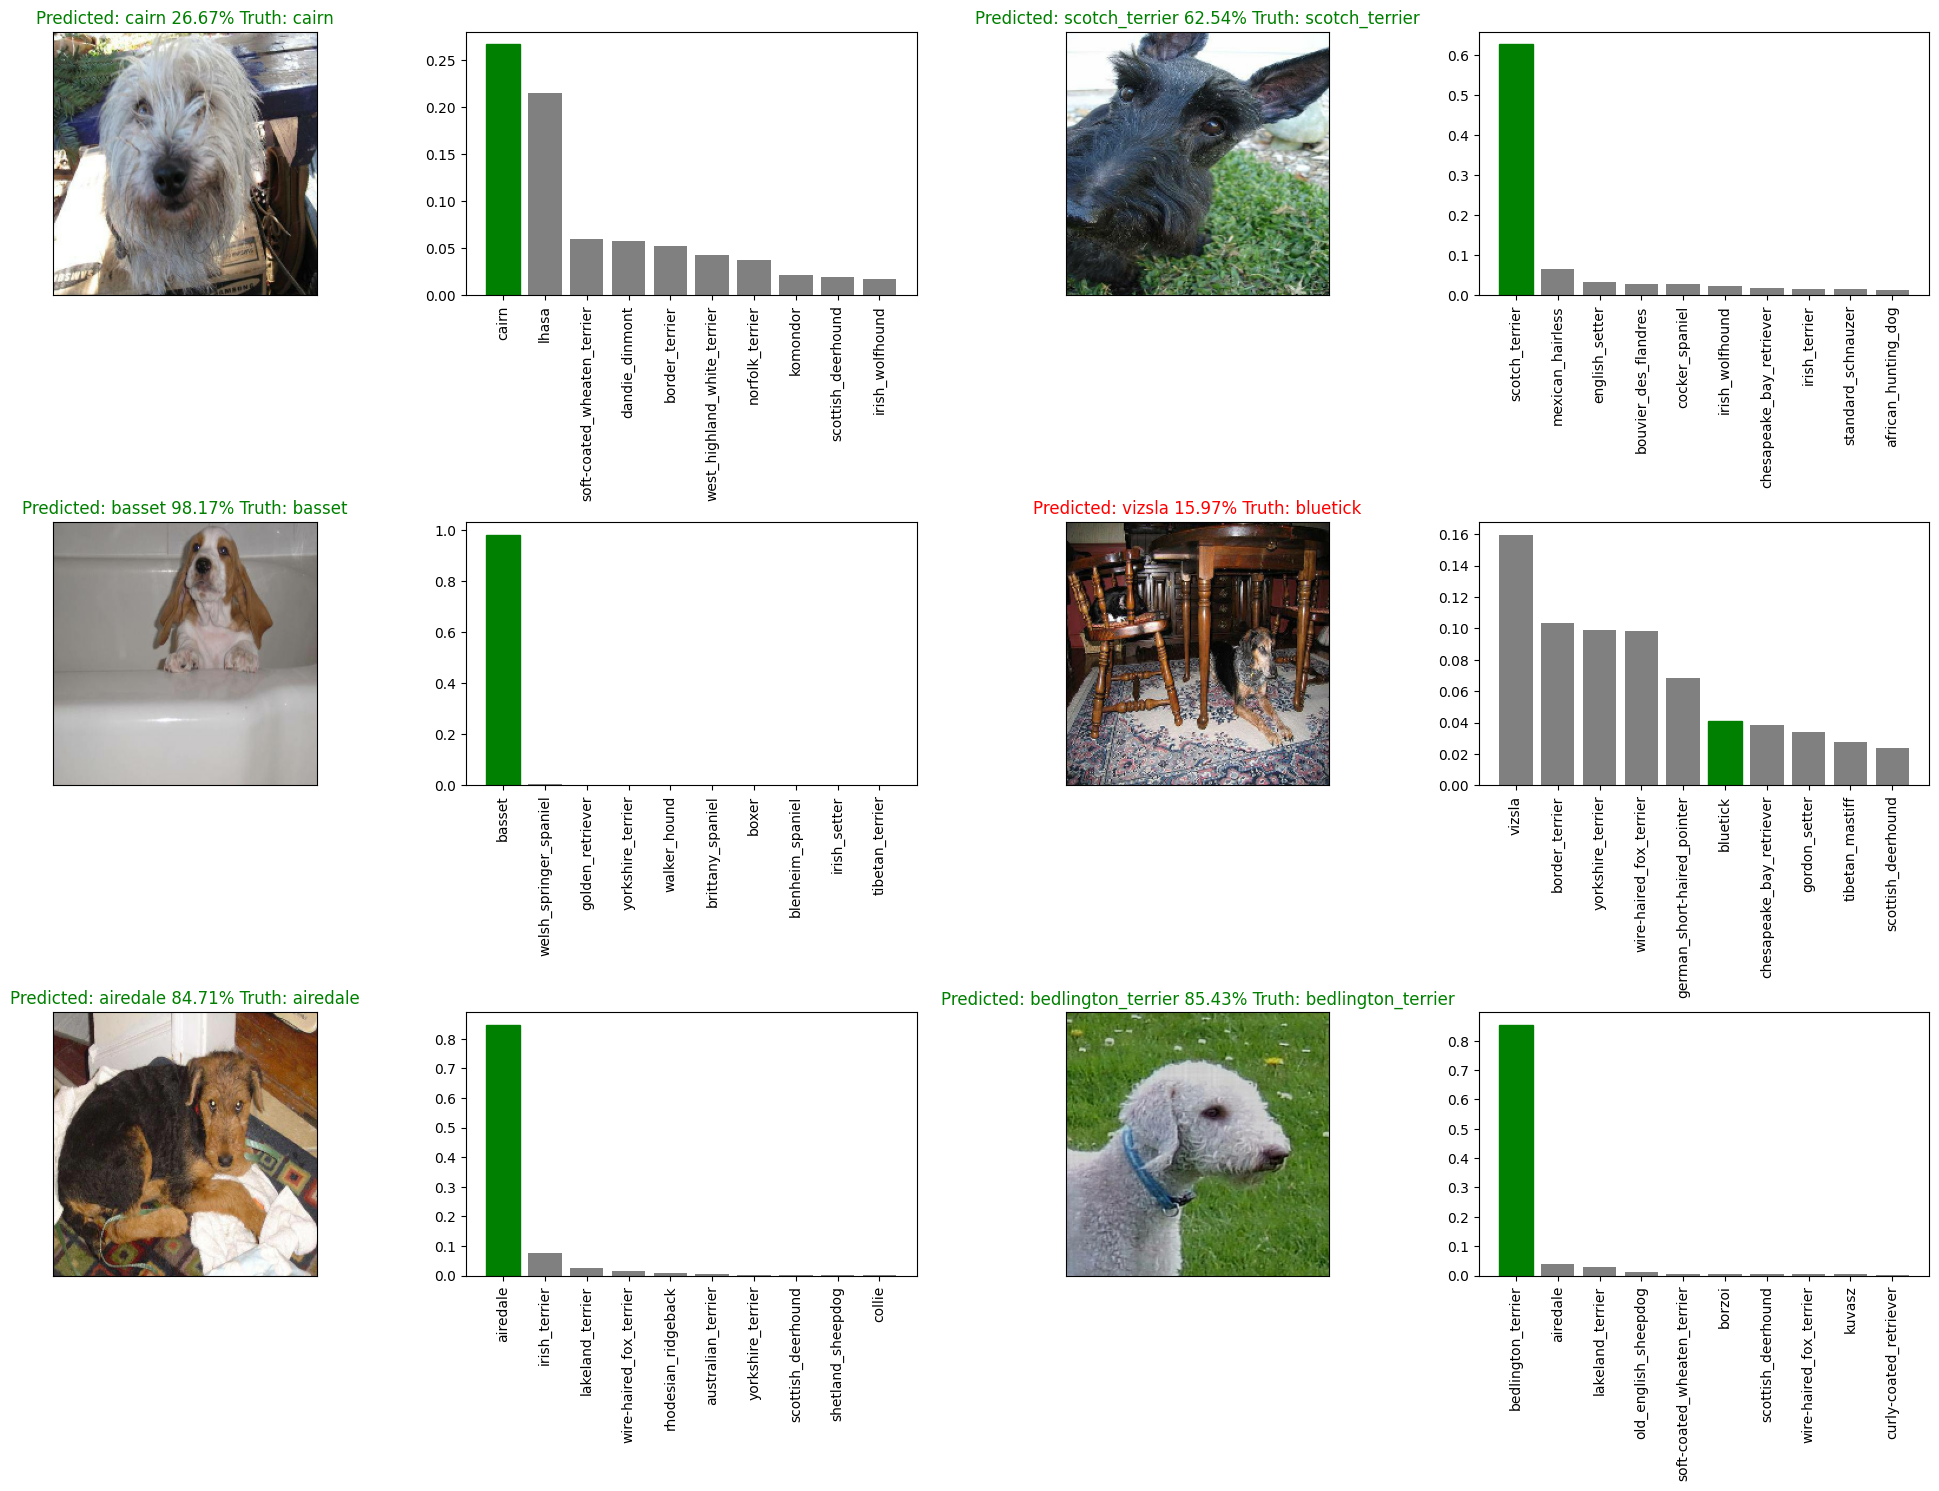

In [223]:
i_multiplier = 0
num_rows =  3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2 *i+1)
  plot_pred(prediction_probabilities=predictions,
           labels=val_labels,
           images=val_images,
           n = i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout()
plt.show()

## Saving and Reloading a trained model

In [230]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a model directory and appends a suffix (string)
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog vision/models",
                          datetime.datetime.now().strftime("%Y%m%d - %H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5" # Save format of model
  print(f"Saving model to : {model_path}...")
  model.save(model_path)
  return model_path

In [240]:
def load_model(model_path):
    """
    Loads a saved model from a specified path.
    """
    print(f"Loading a saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer": hub.KerasLayer})
    return model


In [241]:
# Save the model trained on 1000 images
save_model(model, suffix='1000_images_mobilenetV2-Adam')

Saving model to : /content/drive/MyDrive/Dog vision/models/20231023 - 202258-1000_images_mobilenetV2-Adam.h5...


'/content/drive/MyDrive/Dog vision/models/20231023 - 202258-1000_images_mobilenetV2-Adam.h5'

#### Reaload the model

In [242]:
# Load trained model
loaded_1000_image_model = load_model('/content/drive/MyDrive/Dog vision/models/20231023 - 201616-1000_images_mobilenetV2-Adam.h5')

Loading a saved model from: /content/drive/MyDrive/Dog vision/models/20231023 - 201616-1000_images_mobilenetV2-Adam.h5


In [243]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 103ms/step - loss: 1.1970 - accuracy: 0.6950


[1.1969574689865112, 0.6949999928474426]

In [244]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 3s 173ms/step - loss: 1.1970 - accuracy: 0.6950


[1.1969574689865112, 0.6949999928474426]

## Scaling up
Use the trained model on the full dataset

In [246]:
# Training a model on the full data
len(X), len(y)

(10222, 10222)

In [247]:
len(X_train)

800

In [248]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

Creating training data batches...


In [249]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [250]:
# Creat a model for the full data
full_model = create_model()

Building model with : https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4


In [252]:
# Customize the callbacks for the full model
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)



In [255]:
# Fit the full model to the full data
history_2 = full_model.fit(x=full_data,
                           epochs=NUM_EPOCHS,
                           callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 40s 102ms/step - loss: 1.2908 - accuracy: 0.6808
Epoch 2/100
320/320 [==============================] - 32s 101ms/step - loss: 0.3856 - accuracy: 0.8804
Epoch 3/100
320/320 [==============================] - 33s 101ms/step - loss: 0.2236 - accuracy: 0.9393
Epoch 4/100
320/320 [==============================] - 33s 102ms/step - loss: 0.1430 - accuracy: 0.9675
Epoch 5/100
320/320 [==============================] - 32s 100ms/step - loss: 0.0997 - accuracy: 0.9789
Epoch 6/100
320/320 [==============================] - 32s 99ms/step - loss: 0.0714 - accuracy: 0.9882
Epoch 7/100
320/320 [==============================] - 34s 105ms/step - loss: 0.0548 - accuracy: 0.9915
Epoch 8/100
320/320 [==============================] - 32s 99ms/step - loss: 0.0433 - accuracy: 0.9950
Epoch 9/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0347 - accuracy: 0.9968
Epoch 10/100
320/320 [==============================] - 32s 98ms/s

In [256]:
save_model(full_model,  suffix='full-image-set-mobilenetv2-Adam')

Saving model to : /content/drive/MyDrive/Dog vision/models/20231023 - 204706-full-image-set-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/Dog vision/models/20231023 - 204706-full-image-set-mobilenetv2-Adam.h5'

### Making Prediction of the test data set

In [265]:
# Load the dataset
test_path = '/content/drive/MyDrive/Dog vision/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Dog vision/test/ebaafedb1a8a61e8d3f9eaa271b27629.jpg',
 '/content/drive/MyDrive/Dog vision/test/ebbbbe14c3e968a8f73490d024472768.jpg',
 '/content/drive/MyDrive/Dog vision/test/ebd77a2851ff497cbabda3639a82857c.jpg',
 '/content/drive/MyDrive/Dog vision/test/ebe4a8b8507fa28905cb7e70b90b9170.jpg',
 '/content/drive/MyDrive/Dog vision/test/ebe58f64e95c071d30eaceb907b7375c.jpg',
 '/content/drive/MyDrive/Dog vision/test/ebf7096a543da53b1e4759753aedad26.jpg',
 '/content/drive/MyDrive/Dog vision/test/ebf3e1d5583ceff0a51a8c6a750b367b.jpg',
 '/content/drive/MyDrive/Dog vision/test/ec036cf752a803815c0e8ecc6601b0e3.jpg',
 '/content/drive/MyDrive/Dog vision/test/ec0ed65df0e457182b62ee172783c574.jpg',
 '/content/drive/MyDrive/Dog vision/test/ec0a814cc971dbe6e618a9a37ba355f8.jpg']

In [266]:
len(test_filenames)

10357

In [267]:
# Create test data batches
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [268]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [269]:
# Load trained model
loaded_full_model = load_model('/content/drive/MyDrive/Dog vision/models/20231023 - 204706-full-image-set-mobilenetv2-Adam.h5')
loaded_full_model

Loading a saved model from: /content/drive/MyDrive/Dog vision/models/20231023 - 204706-full-image-set-mobilenetv2-Adam.h5


In [270]:
# Make predictions using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                           verbose=1)

324/324 [==============================] - 30s 92ms/step


In [273]:
# Save predictions (numpy array ) to csv(for access later)
np.savetxt('/content/drive/MyDrive/Dog vision/preds_array.csv', test_predictions, delimiter=',')

In [276]:
# Load the predictions  (Numpy array from csv file
test_predictions = np.loadtxt('/content/drive/MyDrive/Dog vision/preds_array.csv', delimiter=',')
test_predictions[:10]

array([[2.33867675e-10, 4.34911940e-10, 4.52032900e-08, ...,
        1.49891077e-09, 3.21073168e-10, 1.23473555e-07],
       [2.65877920e-09, 3.80079150e-08, 2.44059495e-10, ...,
        2.30895658e-09, 8.40036547e-12, 4.01975541e-07],
       [3.26266559e-07, 1.21152705e-04, 7.71684316e-09, ...,
        4.23163549e-09, 1.33145428e-09, 2.52533653e-07],
       ...,
       [3.01440107e-13, 9.27014554e-09, 6.66315625e-09, ...,
        6.07930151e-09, 1.60417495e-11, 2.08346886e-08],
       [1.38601948e-07, 7.44484918e-09, 8.84870843e-08, ...,
        1.93064741e-04, 2.46340369e-06, 7.13054214e-06],
       [6.18562656e-13, 4.12712531e-08, 3.27611338e-13, ...,
        4.67007322e-09, 1.97490344e-10, 2.08733543e-13]])

In [278]:
test_predictions.shape

(10357, 120)

# The Kaggle submission Format

In [281]:
# Create a pandas dataframe with and ID column as well as column for each dog bree
preds_df = pd.DataFrame(columns = ['id'] + list(unique_breeds))
preds_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [284]:
# Apppend test image ID's t prediction Dataframe
test_ids = [os.path.splitext(path) for path in os.listdir(test_path)]
preds_df['id'] = test_ids

In [285]:
preds_df.head()

id affenpinscher afghan_hound  \
0  (ebaafedb1a8a61e8d3f9eaa271b27629, .jpg)           NaN          NaN   
1  (ebbbbe14c3e968a8f73490d024472768, .jpg)           NaN          NaN   
2  (ebd77a2851ff497cbabda3639a82857c, .jpg)           NaN          NaN   
3  (ebe4a8b8507fa28905cb7e70b90b9170, .jpg)           NaN          NaN   
4  (ebe58f64e95c071d30eaceb907b7375c, .jpg)           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [286]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df

id  affenpinscher  afghan_hound  \
0      (ebaafedb1a8a61e8d3f9eaa271b27629, .jpg)   2.338677e-10  4.349119e-10   
1      (ebbbbe14c3e968a8f73490d024472768, .jpg)   2.658779e-09  3.800792e-08   
2      (ebd77a2851ff497cbabda3639a82857c, .jpg)   3.262666e-07  1.211527e-04   
3      (ebe4a8b8507fa28905cb7e70b90b9170, .jpg)   5.030466e-07  1.041275e-05   
4      (ebe58f64e95c071d30eaceb907b7375c, .jpg)   7.986096e-12  4.198570e-09   
...                                         ...            ...           ...   
10352  (0745215532a68e30976e45ea0389ea61, .jpg)   6.212410e-10  6.565215e-07   
10353  (07525d1433a6ea0cb8ef07baa6a392bf, .jpg)   3.285317e-07  2.466098e-05   
10354  (075c02a433329d00eb726434d8431efd, .jpg)   5.572902e-13  1.190783e-07   
10355  (076144231ddb6a687889696e1978edfc, .jpg)   2.870424e-05  5.968583e-09   
10356  (0763ebab76bfd9cbfaac696cc604d35e, .jpg)   5.641608e-08  1.017933e-05   

       african_hunting_dog      airedale  american_staffordshire_terrier  \
0             4.520329e-08  1.286196e-07                    4.329006e-11   
1             2.440595e-10  2.635169e-11                    3.321625e-10   
2             7.716843e-09  4.411575e-09                    3.246937e-11   
3             5.771901e-08  1.459268e-07                    3.927642e-08   
4             6.845489e-09  4.460861e-10                    1.008617e-08   
...                    ...           ...                             ...   
10352         8.873798e-10  1.379662e-08                    3.383763e-09   
10353         2.005379e-08  5.860348e-09                    4.651721e-06   
10354         1.737732e-10  1.119400e-08                    6.034482e-10   
10355         1.280026e-07  8.589438e-08                    1.760011e-09   
10356         1.886575e-09  3.425195e-07                    8.897630e-08   

        appenzeller  australian_terrier       basenji        basset  ...  \
0      3.292281e-04        1.437238e-06  1.435897e-08  1.337547e-10  ...   
1      1.387757e-11        9.999321e-01  1.777662e-08  6.975641e-10  ...   
2      1.228377e-10        1.032507e-09  1.431572e-11  1.618146e-09  ...   
3      2.602817e-05        1.577222e-04  1.663186e-06  1.599090e-07  ...   
4      5.244753e-10        1.965679e-11  2.350412e-11  6.154093e-10  ...   
...             ...                 ...           ...           ...  ...   
10352  9.819650e-09        4.189484e-08  3.507728e-09  9.578680e-10  ...   
10353  1.590986e-07        5.424034e-08  3.908401e-05  2.059776e-08  ...   
10354  1.074238e-07        5.965806e-10  2.386797e-10  6.003312e-03  ...   
10355  2.335832e-10        6.529170e-11  1.033514e-12  4.375399e-15  ...   
10356  6.411645e-08        1.693220e-08  9.056674e-09  1.314742e-06  ...   

         toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0      9.023323e-10  1.932717e-06  1.445399e-06  4.107519e-07  2.401132e-08   
1      2.154255e-08  1.400410e-07  2.478935e-09  5.983052e-13  5.097060e-13   
2      1.363840e-09  4.023480e-12  1.328415e-10  3.775189e-10  4.957113e-10   
3      2.469221e-07  8.015872e-07  4.938824e-08  1.170043e-04  6.929429e-07   
4      5.149123e-13  4.594790e-10  6.461190e-07  4.658072e-04  2.073751e-08   
...             ...           ...           ...           ...           ...   
10352  4.197753e-07  4.000518e-11  4.428664e-09  1.015685e-11  1.516602e-07   
10353  5.599839e-07  5.882319e-09  2.756399e-09  2.415275e-06  2.409192e-08   
10354  3.548129e-08  1.662732e-14  2.878060e-10  1.933194e-07  5.805450e-11   
10355  5.284375e-12  3.424097e-09  3.329762e-13  1.343947e-10  1.325280e-11   
10356  5.239800e-02  1.334550e-10  1.167118e-07  1.161200e-08  2.728081e-05   

       welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0                1.872541e-08                 1.191067e-10  1.498911e-09   
1                1.093334e-08                 1.175010e-07  2.308957e-09   
2                7.922654e-10                 2.943461e-12  4.231635e-09   
3    

In [288]:
# Export to csv
preds_df.to_csv('/content/drive/MyDrive/Dog vision/full_mode_predictions_submission_1_mobilenetv2.csv', index=False)